In [3]:
import pandas as pd
import numpy as np

C:\Users\gorla\anaconda3\desktop\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# Load the datasets
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')
tags_df = pd.read_csv('tags.csv')

# How many ".csv" files are available in the dataset?

In [5]:
csv_files = ['movies.csv', 'ratings.csv', 'links.csv', 'tags.csv']
count = len(csv_files)
print(f'Number of CSV files: {count}')

Number of CSV files: 4


# What is the shape of "movies.csv" and "ratings.csv"?

In [6]:
datasets = {'movies.csv': movies_df, 'ratings.csv': ratings_df}
for name, df in datasets.items():
    print(f'Shape of {name}: {df.shape}')

Shape of movies.csv: (9742, 3)
Shape of ratings.csv: (100836, 4)


# How many unique "userId" are available in "ratings.csv"?

In [7]:
unique_users = len(ratings_df['userId'].unique())
print(f'Number of unique userId: {unique_users}')

Number of unique userId: 610


# Which movie has recieved maximum number of user ratings?

In [8]:
# We find the movieId with the maximum number of ratings
max_ratings_movie_id = ratings_df.groupby('movieId').size().idxmax()

# After we merge with movies to get the name of the movie
max_rated_movie = movies_df.loc[movies_df['movieId'] == max_ratings_movie_id, 'title'].values[0]
print(f'Movie with maximum number of user ratings: {max_rated_movie}')

Movie with maximum number of user ratings: Forrest Gump (1994)


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [9]:
# Find movieId for 'Matrix, The'
matrix_movie_id = movies_df[movies_df['title'].str.contains('Matrix, The', case=False, na=False)]['movieId'].values
if matrix_movie_id.size > 0:
    matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id[0]]['tag'].unique()
    print(f'Tags for Matrix, The (1999): {matrix_tags}')
else:
    print('Movie "Matrix, The" not found.')

Tags for Matrix, The (1999): ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [10]:
# find movieId for 'Terminator 2'
t2_movie_id = movies_df[movies_df['title'].str.contains('Terminator 2', case=False, na=False)]['movieId'].values[0]
# Calculate the average rating
t2_ratings = ratings_df[ratings_df['movieId'] == t2_movie_id]['rating'].mean()
print(f'Average rating for Terminator 2: Judgment Day (1991): {t2_ratings}')

Average rating for Terminator 2: Judgment Day (1991): 3.970982142857143


# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

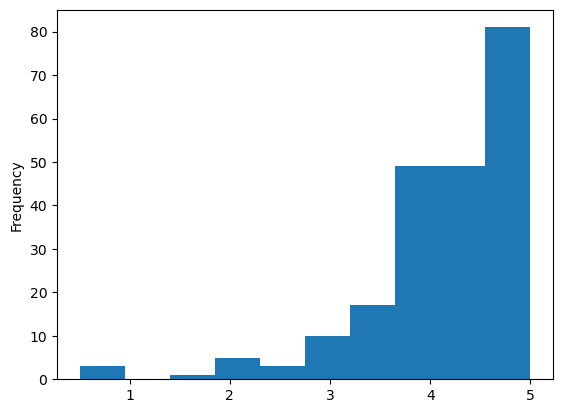

In [11]:
fight_club_id = movies_df[movies_df['title'].str.contains('Fight Club')]['movieId'].values[0]
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_id]['rating']
fight_club_distribution = fight_club_ratings.plot.hist(bins=10).get_figure()
fight_club_distribution.savefig('fight_club_distribution.png')

In [12]:
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
grouped_ratings.columns = ['count', 'mean_rating']

filtered_movies = grouped_ratings[grouped_ratings['count'] > 50]

popular_movies = pd.merge(filtered_movies, movies_df, on='movieId')

In [13]:
most_popular_movie = popular_movies[popular_movies['mean_rating'] == popular_movies['mean_rating'].max()]
print(f'Most popular movie based on average user ratings: {most_popular_movie["title"].values[0]}')

Most popular movie based on average user ratings: Shawshank Redemption, The (1994)


In [14]:
top_5_movies = popular_movies.sort_values(by='count', ascending=False).head(5)
print('Top 5 popular movies based on the number of user ratings:')
print(top_5_movies[['title', 'count']])

Top 5 popular movies based on the number of user ratings:
                                title  count
61                Forrest Gump (1994)    329
53   Shawshank Redemption, The (1994)    317
49                Pulp Fiction (1994)    307
99   Silence of the Lambs, The (1991)    279
248                Matrix, The (1999)    278


In [15]:
import pandas as pd

# Load the datasets
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')

# Group by movieId and calculate the number of ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

# Filter movies with more than 50 ratings
filtered_movies_df = ratings_grouped[ratings_grouped['rating_count'] > 50]

# Merge with movies and links data
filtered_movies_df = filtered_movies_df.merge(movies_df, on='movieId')
filtered_movies_df = filtered_movies_df.merge(links_df, on='movieId')

print(f"Number of movies with more than 50 ratings: {len(filtered_movies_df)}")

Number of movies with more than 50 ratings: 436


In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

# Load your dataset (Ensure this file contains 'movieId', 'title', 'genres', and 'imdbId' if available)
movies_df = pd.read_csv('movies.csv')

# Step 1: Verify the presence of necessary columns
print(movies_df.columns)  # Ensure 'imdbId' and 'genres' are present

# If 'imdbId' is not present, merge with another DataFrame that contains it (Optional)
# Uncomment the lines below if you need to merge with an external IMDb dataset
# imdb_data = pd.read_csv('imdb_data.csv')  # Ensure this contains 'movieId' and 'imdbId'
# movies_df = pd.merge(movies_df, imdb_data, on='movieId', how='left')

# Step 2: Filter the DataFrame based on genre (Adjust the filter as needed)
filtered_movies_df = movies_df[movies_df['genres'].str.contains('Action', na=False)]  # Example filter for Action movies

# Step 3: Define a function to retrieve IMDb reviews
def get_imdb_reviews(imdb_id):
    reviews = []
    url = f'https://www.imdb.com/title/tt{imdb_id}/reviews'
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

    max_retries = 3
    for attempt in range(max_retries):
        try:
            response = requests.get(url, headers=headers)
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')
                review_divs = soup.find_all('div', class_='text show-more__control')
                for div in review_divs:
                    reviews.append(div.get_text())
                break
            else:
                print(f"Failed to retrieve reviews for IMDb ID {imdb_id}. Status code: {response.status_code}")
        except Exception as e:
            print(f"Error retrieving reviews for IMDb ID {imdb_id}: {e}")
            time.sleep(2)  # Wait before retrying
        else:
            if attempt < max_retries - 1:
                print("Retrying...")
                time.sleep(2)  # Wait before retrying
            else:
                print("Max retries reached. Skipping this IMDb ID.")
    
    return reviews

# Step 4: Apply the review-fetching function if 'imdbId' column exists
if 'imdbId' in filtered_movies_df.columns:
    filtered_movies_df['imdb_reviews'] = filtered_movies_df['imdbId'].apply(lambda x: get_imdb_reviews(str(x).zfill(7)))
    
    # Display the first few rows to confirm that reviews are being captured
    print(filtered_movies_df[['movieId', 'title', 'imdb_reviews']].head())
else:
    print("Error: 'imdbId' column not found in the DataFrame.")

# Step 5: Optionally save the filtered DataFrame with reviews to a CSV file
filtered_movies_df.to_csv('filtered_movies_with_reviews.csv', index=False)


Index(['movieId', 'title', 'genres'], dtype='object')
Error: 'imdbId' column not found in the DataFrame.
